In [6]:
here = os.getcwd()

import pandas as pd
data_frame = pd.read_csv(os.path.join(here, 'HTRU_2.csv'))
data_frame.columns =['Mean of Int. Prof.', 'Stand. Deviation of Int. Prof.', 
                     'Excess Kurtosis of Int. Prof.', 'Skewness of Int. Prof.',
                     'Mean of Curve', ' Stand. Deviation of Curve', 'Excess Kurtosis of Curve',
                     'Skewness of Curve', 'Class']
data_frame

,Mean of Int. Prof.,Stand. Deviation of Int. Prof.,Excess Kurtosis of Int. Prof.,Skewness of Int. Prof.,Mean of Curve,Stand. Deviation of Curve,Excess Kurtosis of Curve,Skewness of Curve,Class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


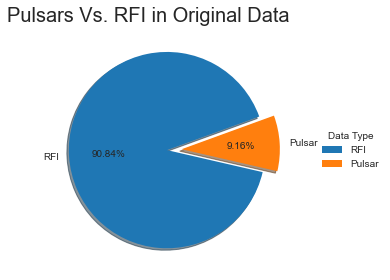

In [12]:
# Pie chart of pulsar vs non pulsar
from matplotlib import pyplot as plt

pie_slices = [len(data_frame[data_frame.Class == 0]), len(data_frame[data_frame.Class == 1])]
labels = ['RFI', 'Pulsar']

explode = (0,0.15)


plt.style.use("seaborn-dark")

plt.pie(pie_slices, labels=labels, explode=explode, autopct='%1.2f%%',
        shadow=True, startangle=20, )

plt.title("Pulsars Vs. RFI in Original Data", fontsize=20, loc="right")
plt.tight_layout()
plt.legend(title='Data Type', loc='right', bbox_to_anchor=(1,0,.4,1), )
plt.show()

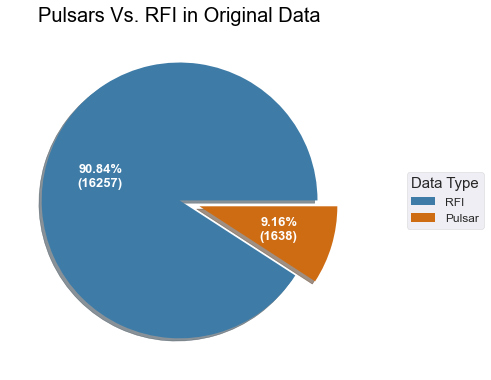

In [57]:
# ORIGINAL DATA

import numpy as np
import locale
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

pie_slices = [len(data_frame[data_frame.Class == 0]), len(data_frame[data_frame.Class == 1])]
labels = ['RFI', 'Pulsar']

explode = (0,0.15)


plt.style.use("seaborn-bright")
color = ['#3e7ca7','#Ce6c14']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pie_slices, autopct=lambda pct: func(pct, pie_slices), textprops={ 'fontsize':13, 'color':"w"}, explode=explode, shadow=True, colors=color)

plt.setp(autotexts, **{'weight':'bold'})

leg = ax.legend(wedges, labels, loc='right', bbox_to_anchor=(1,0,.4,1), fontsize=12, frameon=True)

leg.set_title('Data Type', prop={'size':15})

ax.set_title("Pulsars Vs. RFI in Original Data", fontsize=20, color='k')


# ax.set_explode= explode

plt.tight_layout()

plt.savefig('graphics\PulsarsOriginalPercentages.png')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

x = data_frame.copy()
x.drop(['Class'], axis=1, inplace=True)
y = data_frame.copy()
y.drop(['Mean of Int. Prof.', 'Stand. Deviation of Int. Prof.', 
                     'Excess Kurtosis of Int. Prof.', 'Skewness of Int. Prof.',
                     'Mean of Curve', ' Stand. Deviation of Curve', 'Excess Kurtosis of Curve',
                     'Skewness of Curve'], axis=1, inplace=True)
print(x.shape)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=1)

print(len(y_train[y_train.Class == 0]))
print(len(y_train[y_train.Class == 1]))

print(len(y_test[y_test.Class == 0]))
print(len(y_test[y_test.Class == 1]))

(17897, 8)
(17897, 1)
13014
1303
3244
336


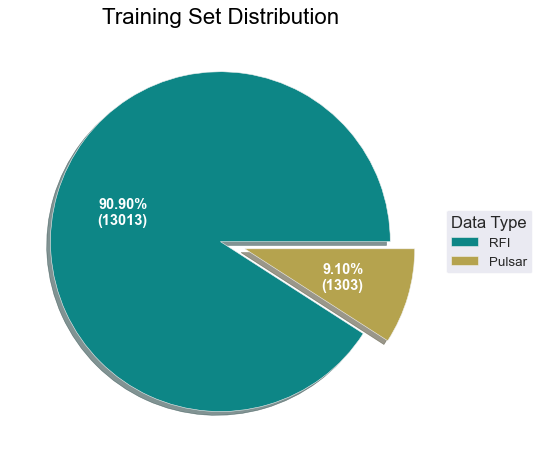

In [91]:
# TRAINING PIE CHART

pie_slices = [len(y_train[y_train.Class == 0]), len(y_train[y_train.Class == 1])]
labels = ['RFI', 'Pulsar']

explode = (0,0.15)


plt.style.use("seaborn-dark")
color =['#0d8686', '#B5a34e']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pie_slices, autopct=lambda pct: func(pct, pie_slices), textprops={ 'fontsize':13, 'color':"w"}, explode=explode, shadow=True, colors=color)

plt.setp(autotexts, **{'weight':'bold'})

leg = ax.legend(wedges, labels, loc='right', bbox_to_anchor=(1,0,.25,1), fontsize=12, frameon=True)

leg.set_title('Data Type', prop={'size':15})

ax.set_title("Training Set Distribution", fontsize=20, color='k')


# ax.set_explode= explode

plt.tight_layout()

plt.savefig('graphics\TrainingSetDistribution.png')
plt.show()

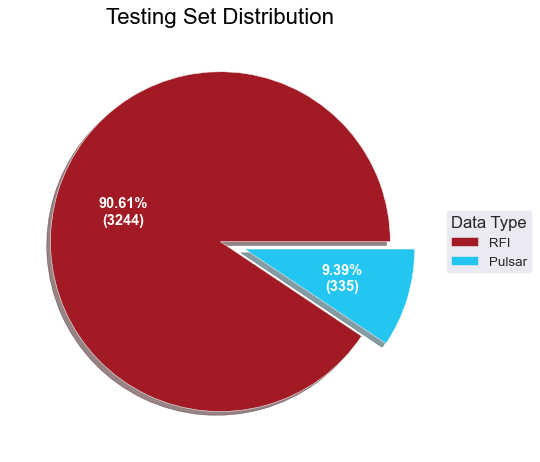

In [92]:
# TESTING PIE CHART

pie_slices = [len(y_test[y_test.Class == 0]), len(y_test[y_test.Class == 1])]
labels = ['RFI', 'Pulsar']

explode = (0,0.15)


plt.style.use("seaborn-dark")
color =['#a21a24', '#22c6f0']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pie_slices, autopct=lambda pct: func(pct, pie_slices), textprops={ 'fontsize':13, 'color':"w"}, explode=explode, shadow=True, colors=color)

plt.setp(autotexts, **{'weight':'bold'})

leg = ax.legend(wedges, labels, loc='right', bbox_to_anchor=(1,0,.25,1), fontsize=12, frameon=True)

leg.set_title('Data Type', prop={'size':15})

ax.set_title("Testing Set Distribution", fontsize=20, color='k')


# ax.set_explode= explode

plt.tight_layout()

plt.savefig('graphics\TestingSetDistribution.png')
plt.show()

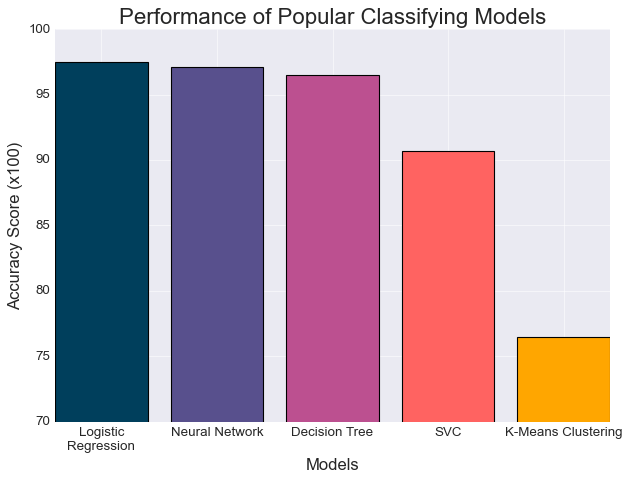

In [84]:
# BAR CHART WITH DIFFERENT METHOD DEFAULT PARAMETERS PERFORMANCE

methods = ['Logistic\nRegression', 'Neural Network','Decision Tree', 'SVC', 'K-Means Clustering']
performance = [97.5,97.1,96.5,90.7,76.5]

plt.style.use('seaborn-darkgrid')
color = ['#003f5c',
        '#58508d',
        '#bc5090',
        '#ff6361',
        '#ffa600']

plt.title('Performance of Popular Classifying Models', fontsize=20)
plt.xlabel('Models', fontsize=15)
plt.ylim([70, 100])
plt.ylabel('Accuracy Score (x100)', fontsize=15)
plt.tight_layout()
plt.bar(methods, performance, color=color)
plt.savefig('graphics/PerformanceOfModels.png')
plt.show()

In [62]:
gridsearch1 = pd.read_csv(os.path.join(here, 'gridsearch1.csv'))
gridsearch1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.562057,0.109615,0.002890,0.001113,identity,5,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.981844,0.977654,0.981139,0.981837,0.978344,0.980164,0.001799,1
1,1.108977,0.106191,0.002455,0.000463,identity,"(10, 10)",lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.981145,0.976606,0.981837,0.981488,0.977995,0.979814,0.002110,2
2,0.683424,0.061161,0.002217,0.000388,identity,10,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.981844,0.976606,0.981139,0.981139,0.977995,0.979744,0.002059,3
3,1.350018,0.144677,0.002993,0.000002,identity,"(10, 10, 10)",lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.980447,0.976257,0.980440,0.981837,0.977995,0.979395,0.001999,4
4,1.325775,0.065542,0.003196,0.000995,identity,"(5, 10, 5)",lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.981145,0.976955,0.981139,0.980091,0.975201,0.978906,0.002406,5


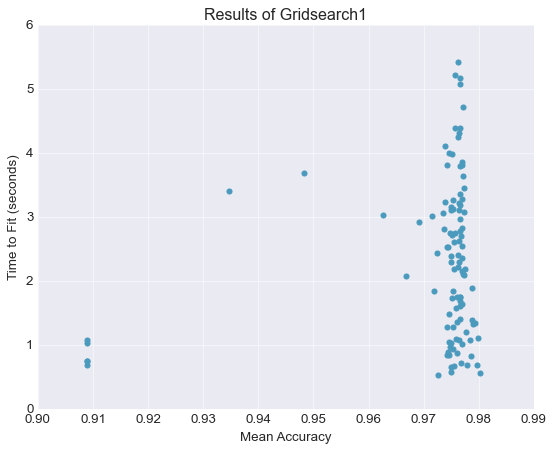

In [78]:
time_taken = gridsearch1['mean_fit_time']
accuracy = gridsearch1['mean_test_score']
rank = gridsearch1['rank_test_score']

plt.style.use('seaborn-darkgrid')
plt.title("Results of Gridsearch1")
plt.xlabel('Mean Accuracy')
plt.ylabel('Time to Fit (seconds)')
plt.scatter(accuracy, time_taken, color="#4a9abd")

plt.savefig('graphics\ResultsOfGridsearch1.png')

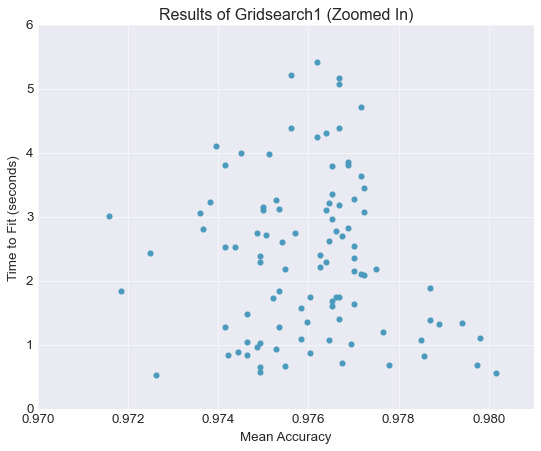

In [79]:
plt.title("Results of Gridsearch1 (Zoomed In)")
plt.xlabel('Mean Accuracy')
plt.xlim([.97,.981])
plt.ylabel('Time to Fit (seconds)')
plt.scatter(accuracy, time_taken, color="#4a9abd")
plt.savefig('graphics\ResultsOfGridsearch1Zoomed.png')

In [71]:
gridsearch2 = pd.read_csv(os.path.join(here, 'gridsearch2.csv'))
gridsearch2.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,62,2.427366,0.116324,0.002992,4.523674e-07,"(14, 14, 14)","{'hidden_layer_sizes': (14, 14, 14)}",0.981145,0.977304,0.981139,0.982885,0.979043,0.980303,0.001932,1
1,42,1.573792,0.185290,0.003300,4.203464e-04,"(10, 10, 10)","{'hidden_layer_sizes': (10, 10, 10)}",0.981145,0.976955,0.981488,0.981837,0.979043,0.980094,0.001846,2
2,72,19.287618,1.050075,0.008976,6.307512e-04,"(100, 100, 100)","{'hidden_layer_sizes': (100, 100, 100)}",0.981844,0.977654,0.981139,0.981837,0.977995,0.980094,0.001874,3
3,50,0.975182,0.055940,0.002794,4.156154e-04,12,{'hidden_layer_sizes': 12},0.981844,0.976257,0.981139,0.981837,0.979043,0.980024,0.002144,4
4,40,0.718044,0.070406,0.002332,4.227207e-04,10,{'hidden_layer_sizes': 10},0.981145,0.977304,0.981139,0.981837,0.978694,0.980024,0.001729,5


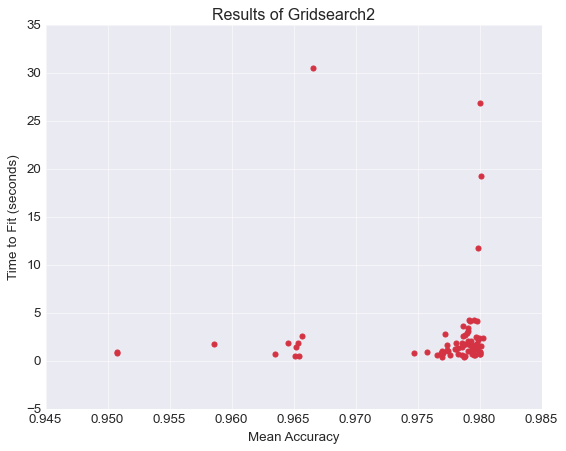

In [81]:
time_taken = gridsearch2['mean_fit_time']
accuracy = gridsearch2['mean_test_score']
rank = gridsearch2['rank_test_score']

plt.title("Results of Gridsearch2")
plt.xlabel('Mean Accuracy')
# plt.xlim([.97,.985])
plt.ylabel('Time to Fit (seconds)')
plt.scatter(accuracy, time_taken, color="#d43343")
plt.tight_layout()
plt.savefig('graphics\ResultsOfGridsearch2.png')

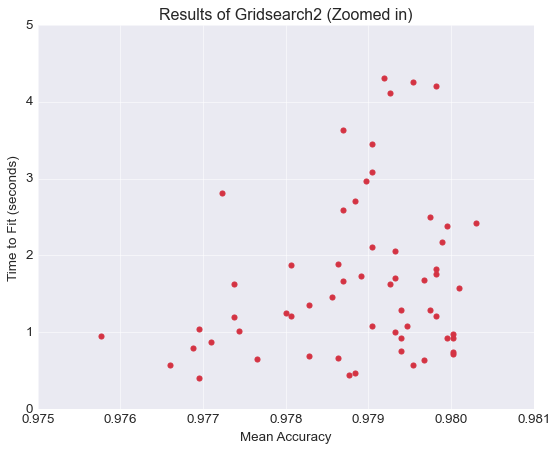

In [82]:
plt.title("Results of Gridsearch2 (Zoomed in)")
plt.xlabel('Mean Accuracy')
plt.xlim([.975,.981])
plt.ylim([0,5])
plt.ylabel('Time to Fit (seconds)')
plt.scatter(accuracy, time_taken, color='#d43343')
plt.savefig('graphics\ResultsOfGridsearch2Zoomed.png')

In [5]:
gridsearch3 = pd.read_csv(os.path.join(here, 'gridsearch3.csv'))
gridsearch3.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3,0.405103,0.049419,0.001998,0.000008,dict,none,newton-cg,"{'class_weight': 'dict', 'penalty': 'none', 's...",0.981844,0.976606,0.981139,0.981837,0.977995,0.979884,0.002170,1
1,0,0.368874,0.039099,0.002062,0.000115,dict,l2,newton-cg,"{'class_weight': 'dict', 'penalty': 'l2', 'sol...",0.981145,0.976955,0.980440,0.981837,0.977646,0.979605,0.001945,2
2,2,0.141893,0.014149,0.002626,0.000774,dict,l2,lbfgs,"{'class_weight': 'dict', 'penalty': 'l2', 'sol...",0.980796,0.976955,0.980789,0.979392,0.977995,0.979186,0.001523,3
3,5,0.120649,0.004675,0.002200,0.000379,dict,none,lbfgs,"{'class_weight': 'dict', 'penalty': 'none', 's...",0.980447,0.976606,0.980789,0.979742,0.977646,0.979046,0.001637,4
4,1,0.197012,0.012637,0.003368,0.001348,dict,l2,sag,"{'class_weight': 'dict', 'penalty': 'l2', 'sol...",0.976257,0.972765,0.975201,0.974502,0.971009,0.973947,0.001857,5


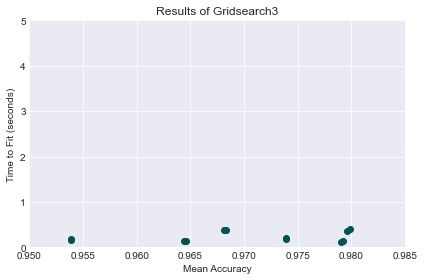

In [7]:
time_taken = gridsearch3['mean_fit_time']
accuracy = gridsearch3['mean_test_score']
rank = gridsearch3['rank_test_score']

plt.title("Results of Gridsearch3")
plt.xlabel('Mean Accuracy')
plt.style.use('seaborn-darkgrid')
plt.xlim([.95,.985])
plt.ylim([0,5])
plt.ylabel('Time to Fit (seconds)')
plt.scatter(accuracy, time_taken, color='#005254')
plt.tight_layout()
plt.savefig('graphics\ResultsOfGridsearch3.png')

In [8]:
gridsearch4 = pd.read_csv(os.path.join(here, 'gridsearch4.csv'))
gridsearch4.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1,0.202297,0.009593,0.002715,0.000393,dict,none,saga,"{'class_weight': 'dict', 'penalty': 'none', 's...",0.974860,0.972067,0.974153,0.973454,0.969962,0.972899,0.001735,1
1,3,0.192114,0.009854,0.003266,0.001109,balanced,none,saga,"{'class_weight': 'balanced', 'penalty': 'none'...",0.958101,0.951466,0.956689,0.950751,0.951100,0.953621,0.003121,2
2,0,0.002592,0.000799,0.000000,0.000000,dict,elasticnet,saga,"{'class_weight': 'dict', 'penalty': 'elasticne...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,2,0.001993,0.000003,0.000000,0.000000,balanced,elasticnet,saga,"{'class_weight': 'balanced', 'penalty': 'elast...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


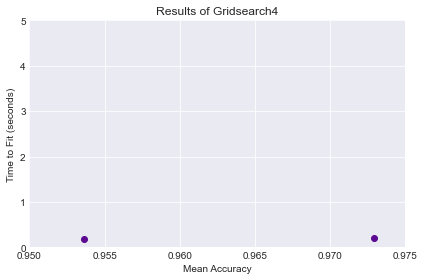

In [14]:
time_taken = gridsearch4['mean_fit_time']
accuracy = gridsearch4['mean_test_score']
rank = gridsearch4['rank_test_score']

plt.title("Results of Gridsearch4")
plt.xlabel('Mean Accuracy')
plt.style.use('seaborn-darkgrid')
plt.xlim([.95,.975])
plt.ylim([0,5])
plt.ylabel('Time to Fit (seconds)')
plt.scatter(accuracy, time_taken, color='#5b0a91')
plt.tight_layout()
plt.savefig('graphics\ResultsOfGridsearch4.png')

In [3]:
# load best model to get heatmap
import pickle
with open('gridsearch2.pkl', 'rb') as f:
    neural_network = pickle.load(f)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_predict = neural_network.predict(x_test)
print('Accuracy Score: ' + str(accuracy_score(y_predict, y_test)))
print('Confusion Matrix:\n' + str(confusion_matrix(y_predict, y_test)))
print('f1 Score: ' + str(f1_score(y_predict, y_test, average=None)))

Accuracy Score: 0.9762569832402235
Confusion Matrix:
[[3225   66]
 [  19  270]]
f1 Score: [0.98699311 0.864     ]


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

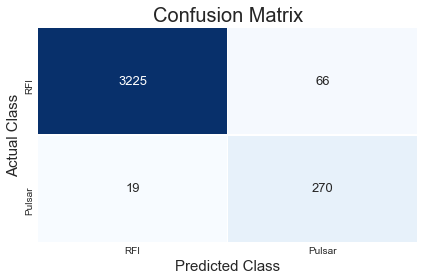

In [66]:
import seaborn as sns
plt.title("Confusion Matrix", fontsize=20)

palette = sns.set_palette('pastel')

sns.heatmap(confusion_matrix(y_predict, y_test),cbar=False,annot=True, annot_kws={'size': 13}, fmt="d", linewidth=.5, robust=True, xticklabels=['RFI','Pulsar'], yticklabels=['RFI', 'Pulsar'], cmap='Blues', vmax = 3225, vmin = 19)

plt.xlabel('Predicted Class', fontsize=15)
plt.ylabel('Actual Class', fontsize=15)
plt.tight_layout()
plt.savefig('graphics\confusion_matrix.png')

sns.color_palette()